In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/content/IPG2211A2N.csv')
df.head()

,DATE,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608


In [3]:
df.shape

(1027, 2)

In [4]:
df.isna().sum()

,0
DATE,0
IPG2211A2N,0


In [5]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1027 non-null   object 
 1   IPG2211A2N  1027 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.2+ KB


In [6]:
#converting the date column
df['DATE']=pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        1027 non-null   datetime64[ns]
 1   IPG2211A2N  1027 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.2 KB


In [8]:
df.set_index('DATE',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1027 entries, 1939-01-01 to 2024-07-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  1027 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


In [10]:
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4608
1939-05-01,3.4608


<Axes: xlabel='DATE'>

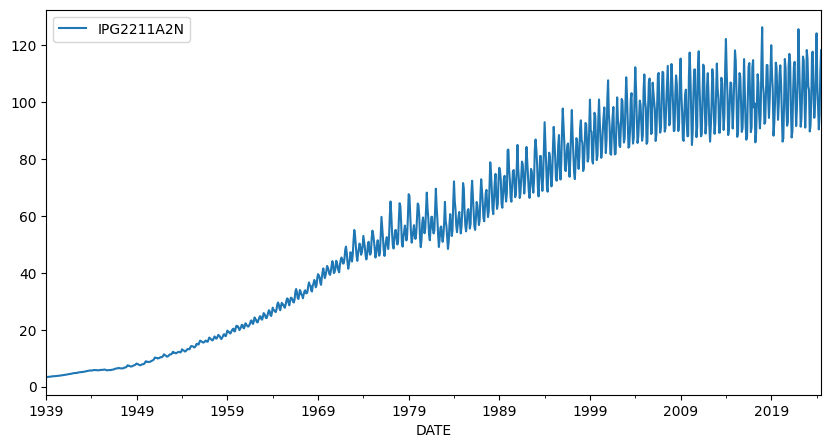

In [11]:
#checking the stationarity of the data
df.plot(figsize=(10,5))

In [12]:
#Augmented Dicky fuller test
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    result=adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1]<=0.05:
        print('Reject null hypothesis Data is stotionary')
    else:
        print('Accept null hypothesis Data is not stationary')

In [13]:
adf_test(df.values)

ADF Statistic: -0.7506157906656332
p-value: 0.8331998510446097
Accept null hypothesis Data is not stationary


In [14]:
#converting the data into stationary
df['First_order']=df['IPG2211A2N'].diff()

In [15]:
df.head()

,IPG2211A2N,First_order
DATE,,
1939-01-01,3.3336,NaN
1939-02-01,3.3591,0.0255
1939-03-01,3.4354,0.0763
1939-04-01,3.4608,0.0254
1939-05-01,3.4608,0.0000


In [16]:
df.dropna(inplace=True)

In [17]:
df.head()

,IPG2211A2N,First_order
DATE,,
1939-02-01,3.3591,0.0255
1939-03-01,3.4354,0.0763
1939-04-01,3.4608,0.0254
1939-05-01,3.4608,0.0000
1939-06-01,3.5117,0.0509


In [18]:
adf_test(df['First_order'])

ADF Statistic: -10.333485790199843
p-value: 2.802780612175215e-18
Reject null hypothesis Data is stotionary


<Axes: xlabel='DATE'>

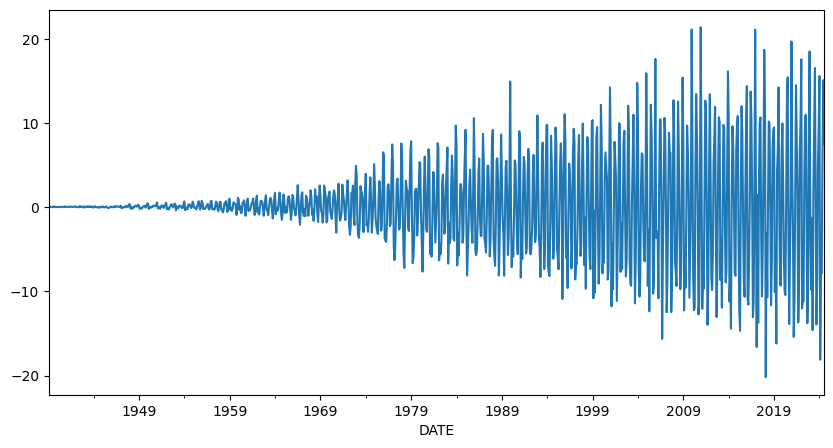

In [19]:
df['First_order'].plot(figsize=(10,5))

In [20]:
from sklearn.model_selection import train_test_split
0.8*len(df)

820.8000000000001

In [21]:
train=df[['First_order']][ :820]
test=df[['First_order']][820:]

In [22]:
#determining the arima parameters p,d,q
#using auto arima model
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.4 MB/s eta 0:00:00


In [23]:
  autoarima=auto_arima(train,seasonal=False)

In [24]:
print(autoarima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  820
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1752.422
Date:                Fri, 30 Aug 2024   AIC                           3514.843
Time:                        11:22:09   BIC                           3538.390
Sample:                    02-01-1939   HQIC                          3523.878
                         - 05-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.001    933.917      0.000       0.998       1.002
ar.L2         -0.9996      0.001  -1586.927      0.000      -1.001      -0.998
ma.L1         -1.0342      0.009   -112.700      0.0

In [25]:
#building the arima model
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(train,order=autoarima.order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
forecast=autoarima.predict(n_periods=len(  test))

In [32]:
df['forecast']=[None]*len(train)+list(forecast)

In [33]:
df.head()

,IPG2211A2N,First_order,forecast
DATE,,,
1939-02-01,3.3591,0.0255,NaN
1939-03-01,3.4354,0.0763,NaN
1939-04-01,3.4608,0.0254,NaN
1939-05-01,3.4608,0.0000,NaN
1939-06-01,3.5117,0.0509,NaN


<Axes: xlabel='DATE'>

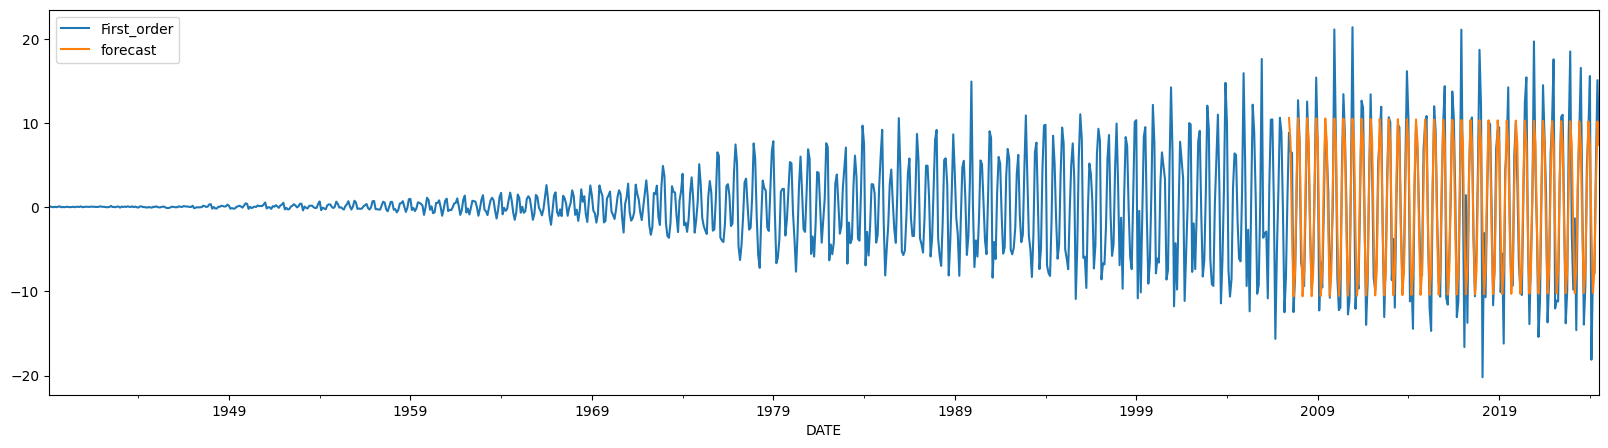

In [34]:
df[['First_order','forecast'] ].plot(figsize=(20,5))

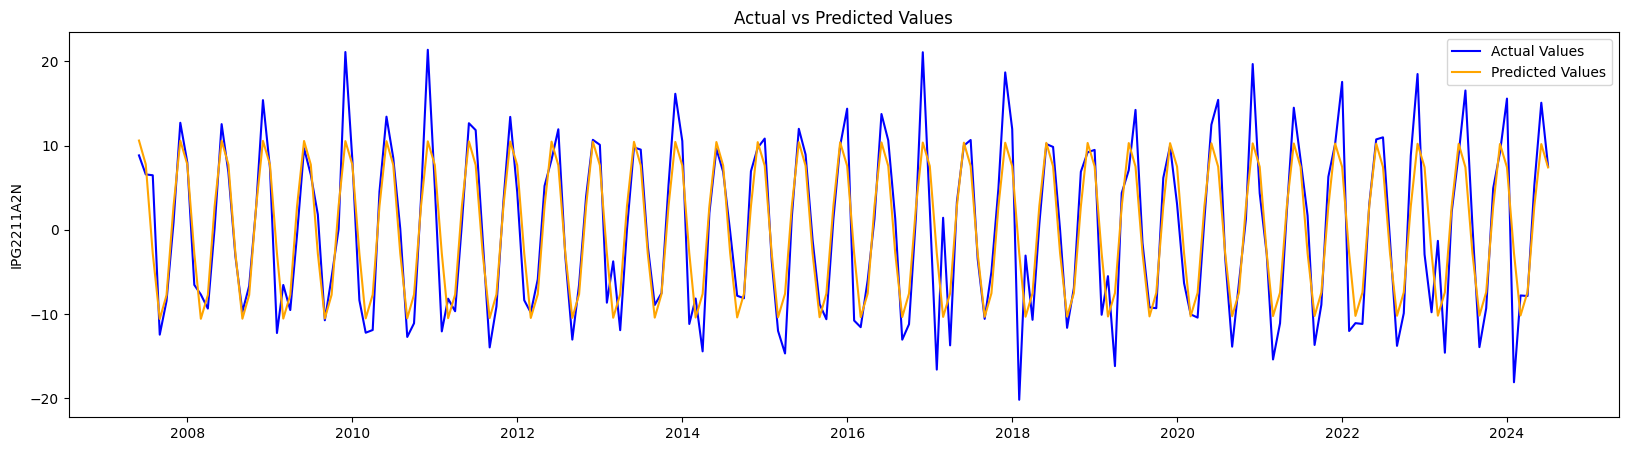

In [38]:
plt.figure(figsize=(20,5))
plt.plot(df['First_order'][820:],color='blue',label='Actual Values')
plt.plot(df['forecast'][820:],color='orange',label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel=('DATE')
plt.ylabel('IPG2211A2N')
plt.legend()


In [39]:
#evaluation matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean=mean_absolute_error(df['First_order'][820:],df['forecast'][820:])
print(f'Mean Absolute Error: {mean}')

Mean Absolute Error: 3.273456438982585


In [41]:
rsme=np.sqrt(mean_squared_error(df['First_order'][820:],df['forecast'][820:]))
print(f'Root Mean Squared Error: {rsme}')

Root Mean Squared Error: 4.476632205779144


In [ ]:
# Time series Analysis/Forecasting project using ARIMA (Auto-Regressive Integrated Moving Average) on a univariate data.